<a href="https://colab.research.google.com/github/chunjunghe/stat_class/blob/main/Mid_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd

In [59]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [60]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


In [61]:
sns.__version__

'0.11.1'

# **파일불러오기**

In [6]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [7]:
from google.colab import files
uploaded = files.upload()


Saving new_people.csv to new_people.csv


In [8]:
people_raw = pd.read_csv('/content/new_people.csv', encoding = 'cp949')

In [9]:
from google.colab import files
uploaded = files.upload()


Saving process.csv to process.csv


In [10]:
process_raw = pd.read_csv('/content/process.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
from google.colab import files
uploaded = files.upload()

Saving suggest.csv to suggest.csv


In [12]:
suggest_raw = pd.read_csv('/content/suggest.csv')

In [13]:
print(people_raw.shape)
print(process_raw.shape)
print(suggest_raw.shape)

(5605, 16)
(68530, 28)
(62658, 12)


In [14]:
print(people_raw.columns)
print(process_raw.columns)
print(suggest_raw.columns)

Index(['DAESU', 'DAE', 'DAE_NM', 'NAME', 'NAME_HAN', 'JA', 'HO', 'BIRTH',
       'BON', 'POSI', 'HAK', 'HOBBY', 'BOOK', 'SANG', 'DEAD', 'URL'],
      dtype='object')
Index(['AGE', 'ANNOUNCE_DT', 'BDG_PRESENT_DT', 'BDG_PROC_DT', 'BDG_SUBMIT_DT',
       'BILL_ID', 'BILL_KIND', 'BILL_NAME', 'BILL_NO', 'BLANK_TCNT',
       'COMMITTEE_NM', 'COMMITTEE_PRESENT_DT', 'COMMITTEE_PROC_DT',
       'COMMITTEE_SUBMIT_DT', 'CURR_TRANS_DT', 'LAW_PRESENT_DT', 'LAW_PROC_DT',
       'LAW_SUBMIT_DT', 'LINK_URL', 'NO_TCNT', 'PROC_RESULT_CD', 'PROPOSER',
       'PROPOSER_KIND_CD', 'PROPOSE_DT', 'RGS_PRESENT_DT', 'RGS_PROC_DT',
       'VOTE_TCNT', 'YES_TCNT'],
      dtype='object')
Index(['BILL_ID', 'BILL_NO', 'BILL_NAME', 'COMMITTEE', 'PROPOSE_DT',
       'PROC_RESULT', 'AGE', 'DETAIL_LINK', 'PROPOSER', 'MEMBER_LIST',
       'RST_PROPOSER', 'PUBL_PROPOSER'],
      dtype='object')


In [21]:
people = people_raw.copy()
process = process_raw.copy()
suggest = suggest_raw.copy()

## ***시간이 지남에 따라 법안 발의안의 개수가 어떻게 변화하는지 시각화***

In [62]:
sns.set(style = 'whitegrid')

In [63]:
suggest = suggest.replace({'':np.nan})
suggest['year'] = suggest['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})
suggest['PROPOSE_DT'] = pd.to_datetime(suggest['PROPOSE_DT'])

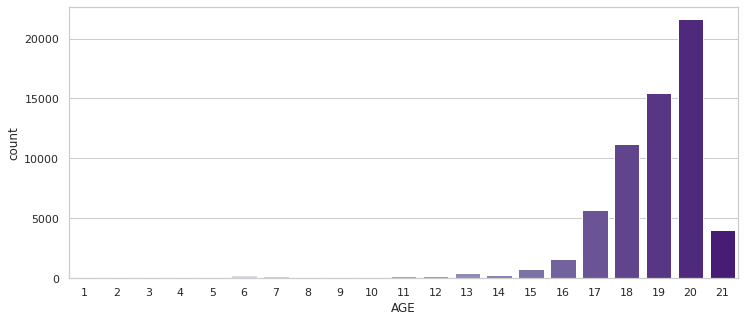

In [64]:
fig = plt.figure(figsize=(12, 5))
sns.countplot(data = suggest, x = 'AGE', palette = 'Purples',
              hue_order = list(suggest['AGE'].value_counts().sort_values(ascending=False).index))



2004년 이후 법안 발의안 수가 급격히 증가하는 것을 확인할 수 있습니다.




## ***법안 심사 소관위원회의 종류 변화***

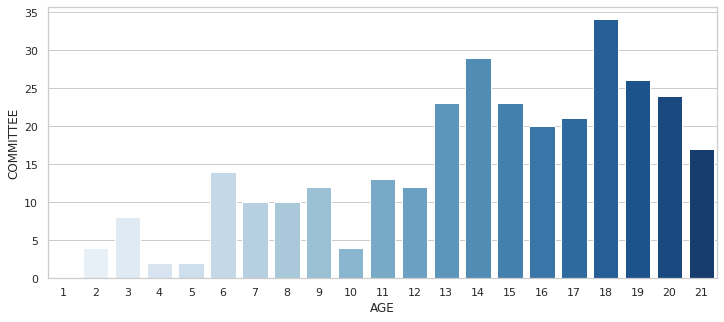

In [65]:
df = suggest.groupby('AGE')['COMMITTEE'].nunique().reset_index()
fig = plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='AGE', y='COMMITTEE', palette = 'Blues')


시간이 흐르면서 심사를 담당하는 소관위원회의 종류도 다양해지는 것을 확인할 수 있습니다. 
즉, 시간이 지남에 따라 다양한 분야의 법안이 제안되고 있다는 것을 알 수 있습니다.

## ***제안된 법안의 처리 과정***

In [66]:
suggest['PROC_RESULT_1'] = suggest['PROC_RESULT'].replace({'대안반영폐기':'폐기',
                                                           '임기만료폐기':'폐기',
                                                           '수정안반영폐기':'폐기',
                                                           '회기불계속폐기':'폐기'})

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

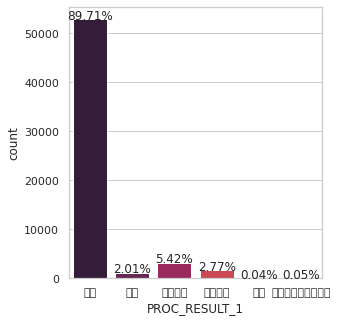

In [69]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
g = sns.countplot(data = suggest, x = 'PROC_RESULT_1', palette = 'rocket')

total_amt = suggest[suggest.PROC_RESULT.notnull()==True].shape[0]

for bar in g.patches:
    height = bar.get_height()
    g.text(bar.get_x()+bar.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=12) 

위의 표는 전체 법안 발의안 처리 결과라고 할 수 있습니다.
그래프 순서는 폐기->철회->수정가결->원안가결->부결->비상국무회의로 이관
입니다.
이 그래프를 통해 제안된 법안 중 약 90%는 본회의 심사에 회부되기 전에 폐기 됨을 확인할 수 있습니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_

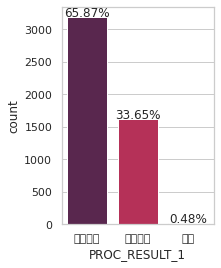

In [70]:
suggest_1 = suggest[(suggest.PROC_RESULT_1 != '폐기')&(suggest.PROC_RESULT_1 != '철회')&(suggest.PROC_RESULT_1 != '비상국무회의로이관')&(suggest.PROC_RESULT_1.notnull()==True)]
plt.subplot(1,2,2)
g1 = sns.countplot(data = suggest_1, x = 'PROC_RESULT_1', palette = 'rocket')

total_amt = suggest_1.shape[0]
for bar in g1.patches:
    height = bar.get_height()
    g1.text(bar.get_x()+bar.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=12) 

위의 그래프는 본회의 심사 상정 발의안 처리 결과입니다.
그래프 순서는 수정가결->원인가결->부결 입니다.
이 그래프를 통해 본회의 심사에 회부된 법안은 대부분 법으로 채택되고 0.48%만 부결되는 것을 확인할 수 있었습니다.

# ***법안의 처리 과정***
## **-소관위원회 심사 날짜**

In [71]:
#suggest data와 process data에 공통으로 있는 것들로 진행
leg = process.merge(suggest, on = 'BILL_ID', how = 'left', suffixes = ["_drop",""])
leg = leg[leg.BILL_ID.isin(suggest['BILL_ID'].unique())]
leg = leg.drop(['AGE_drop', 'BILL_NAME_drop', 'BILL_NO_drop','PROPOSER_drop','PROPOSE_DT_drop'], axis = 1)
leg = leg.reset_index().drop('index', axis = 1)

In [72]:
#datetime 자료형으로 변환
dt_col = leg.columns[leg.columns.str.endswith('DT')]
for col in dt_col:
    leg[col] = pd.to_datetime(leg[col], errors = 'coerce')

In [73]:

committee = leg.loc[leg.AGE==20,['COMMITTEE_SUBMIT_DT','COMMITTEE_PRESENT_DT', 'COMMITTEE_PROC_DT']]
#month
committee['month_submit'] = committee.COMMITTEE_SUBMIT_DT.dt.month
committee['month_present'] = committee.COMMITTEE_PRESENT_DT.dt.month
committee['month_proc'] = committee.COMMITTEE_PROC_DT.dt.month

#weekday
committee['day_submit'] = committee.COMMITTEE_SUBMIT_DT.dt.day_name()
committee['day_present'] = committee.COMMITTEE_PRESENT_DT.dt.day_name()
committee['day_proc'] = committee.COMMITTEE_PROC_DT.dt.day_name()


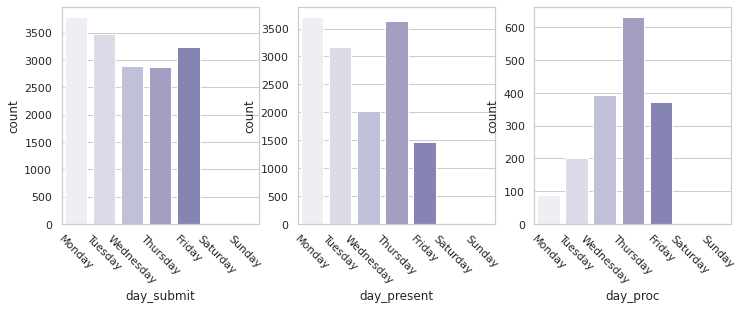

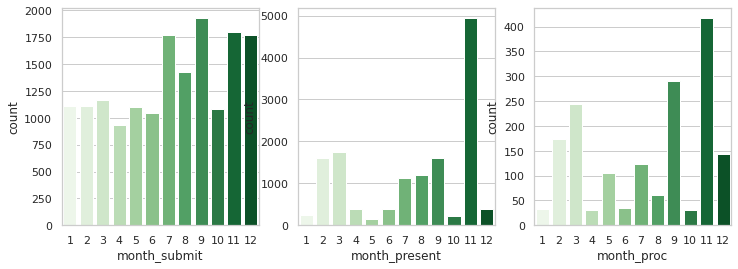

In [74]:
#소관위원회 심사 요일

#소관위원회 회부일 요일
plt.figure(figsize = (12, 4))
plt.subplot(1,3,1)
sns.countplot(data = committee, x = 'day_submit',palette = 'Purples',
             order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation = -45)

#소관위원회 상정일 요일
plt.subplot(1,3,2)
sns.countplot(data = committee, x = 'day_present',palette = 'Purples',
             order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation = -45)


#소관위원회 의결일 요일
plt.subplot(1,3,3)
sns.countplot(data = committee, x = 'day_proc',palette = 'Purples',
             order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation = -45)


#소관위원회 심사 월
plt.figure(figsize=(12,4))

#소관위원회 회부일 월
plt.subplot(1,3,1)
sns.countplot(data = committee, x = 'month_submit',palette = 'Greens',
              order = list(np.arange(1,13,1)))

#소관위원회 상정일 월
plt.subplot(1,3,2)
sns.countplot(data = committee, x = 'month_present',palette = 'Greens',
             order = list(np.arange(1,13,1)))

#소관위원회 의결일 월
plt.subplot(1,3,3)
sns.countplot(data = committee, x = 'month_proc',palette = 'Greens',
             order = list(np.arange(1,13,1)))


###소관위원회 심사 요일 별 분포
그래프를 살펴보면 주말에는 심사를 하지않는 사실을 알 수 있고 그 밖의 다른 특징은 보이지 않음 즉, 요일 별 분포에는 눈에 띄는 패턴을 발견할 수 없음

###소관위원회 심사 월별 분포
소관위원회 회부 그래프를 살펴보면 고르게 분포되어있음을 확인할 수 있다. 하지만 소관위원회 상정 그래프를 살펴보면 지나치게 11월에 집중되어있음을 확인할 수 있다. 또한 소관위원회 의결 그래프도 11월에 집중되어있음을 확인할 수 있다. 

이를 통해 국회의 많은 의안들을 한꺼번에 몰아서 해결한다고 할 수 있다.